In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [17]:
dataset = pd.read_csv('loan.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape[0]

614

### Data cleaning and finding missing values

In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dataset.isnull().sum().sum()

np.int64(149)

In [7]:
dataset.isnull().sum() / dataset.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
dataset.notnull().sum().sum()

np.int64(7833)

In [9]:
(dataset.isnull().sum().sum() / (dataset.shape[0] * dataset.shape[1])) * 100

np.float64(1.8667000751691305)

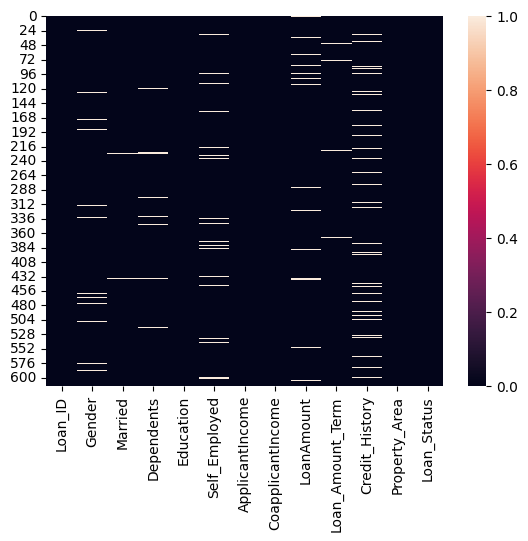

In [10]:
sns.heatmap(dataset.isnull())
plt.show()

### Handling missing values 

In [11]:
dataset.drop(columns=['Credit_History'], inplace=True)

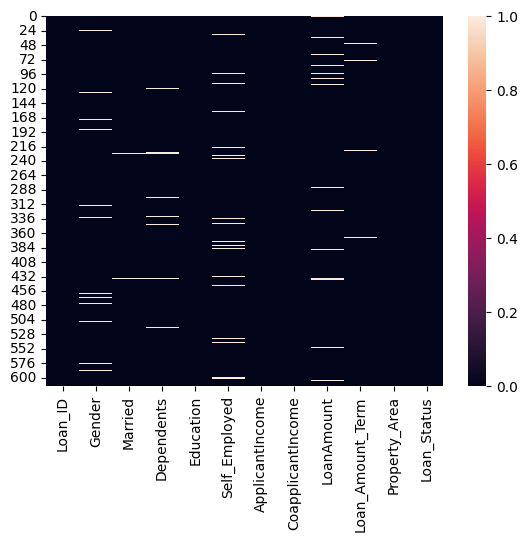

In [12]:
# updated heatmap after dropping column
sns.heatmap(dataset.isnull())
plt.show()

In [13]:
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
dataset.shape

(523, 12)

### Handling Missing Values (imputing category data)

In [16]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
dataset.select_dtypes(include="float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [26]:
from sklearn.impute import SimpleImputer

In [30]:
si = SimpleImputer(strategy='mean')
ar = si.fit_transform(dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [32]:
pd.DataFrame(ar, columns= dataset.select_dtypes(include="float64").columns)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0
...,...,...,...,...
609,0.0,71.000000,360.0,1.0
610,0.0,40.000000,180.0,1.0
611,240.0,253.000000,360.0,1.0
612,0.0,187.000000,360.0,1.0


In [33]:
new_dataset = pd.DataFrame(ar, columns= dataset.select_dtypes(include="float64").columns)

In [34]:
new_dataset.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [35]:
dataset["LoanAmount"].mean()

np.float64(146.41216216216216)